# Linear Regression (No Normalization)

## Reading the CSV File.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.30,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.92,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.50,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.20,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.93,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052


## Preprocessing and cleaning the data

In [ ]:
df.isnull().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [ ]:
df['I_Fat_C'] = df['I_Fat_C'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['I_W'] = df['I_W'].fillna(df['I_W'].mean())

In [ ]:
df['O_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: O_Size, dtype: int64

In [ ]:
df['O_Size'] = df['O_Size'].fillna(df['O_Size'].mode().iloc[0])

In [ ]:
df['O_Establ_Y'] = df['O_Establ_Y'].astype('object')

In [ ]:
df['I_Vis'] = df['I_Vis'].replace(0, np.nan)

In [ ]:
df['I_Vis'] = df['I_Vis'].fillna(df['I_Vis'].mean())

In [ ]:
df = df.drop(['I_Id'] , axis = 1)

In [ ]:
df['O_T'] = df['O_T'].map({'Carrefour': 0, 'Family Basket': 1, 'Cozmo' : 2, 'C-Town': 3 })

In [ ]:
df['I_Recalled'] = df['I_Recalled'].replace({'NO': 0 , 'YES': 1})

## Feature Plotting


In [ ]:
numbers = ['I_W' , 'I_Vis' , 'I_MRP_JD' , 'I_MRP_US' , 'O_Establ_Y' , 'I_O_Sales']
words = ['I_Fat_C' , 'I_category' , 'O_Id' , 'O_Size' , 'I_Recalled' , 'O_Loc_T' , 'O_T']

In [ ]:
def plot_categorical_columns(df, word):
    for cw in word:
        plt.figure()
        plt.title(cw)
        df[cw].value_counts().plot.pie(autopct='%1.1f%%')
        plt.axis('equal')
    plt.show()


In [ ]:
def plot_numerical_columns(df):
  for cn in df[numbers]:
    plt.figure()
    plt.title(cn)
    plt.plot(df[cn])
  plt.show()

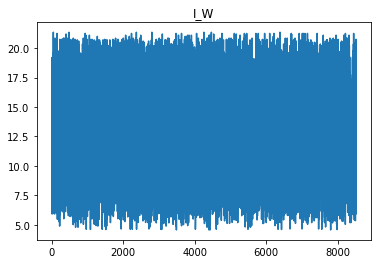

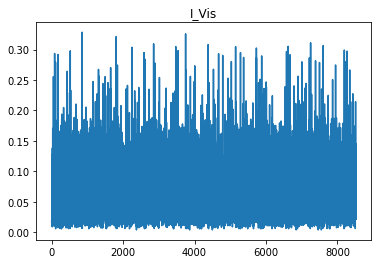

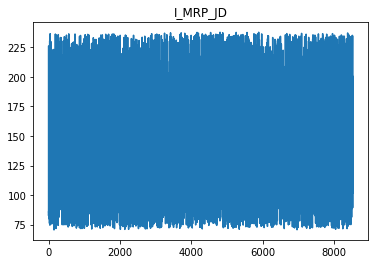

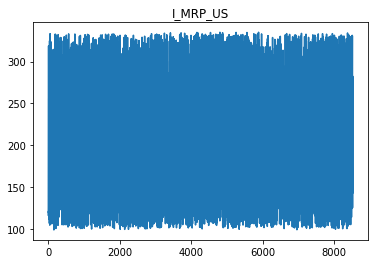

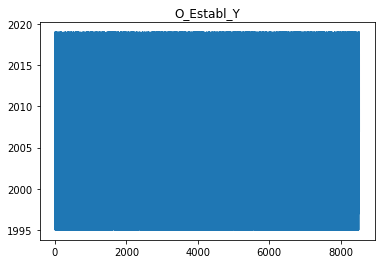

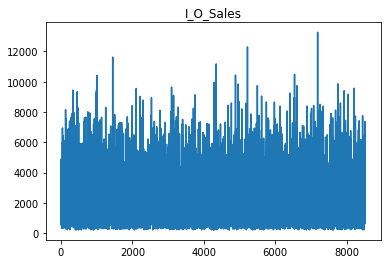

In [ ]:
plot_numerical_columns(df)

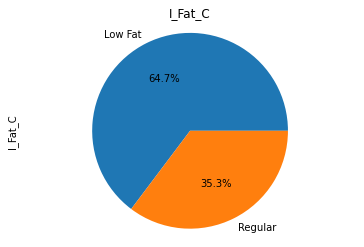

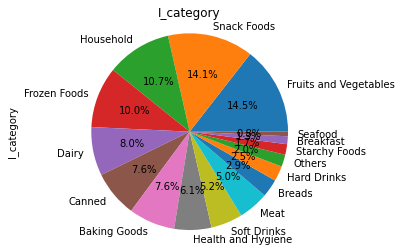

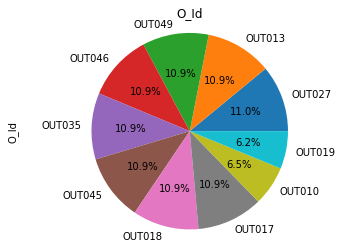

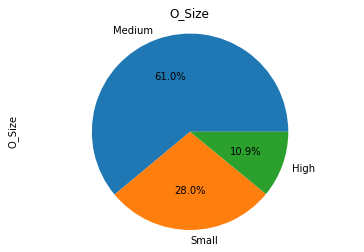

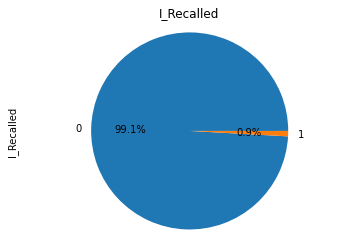

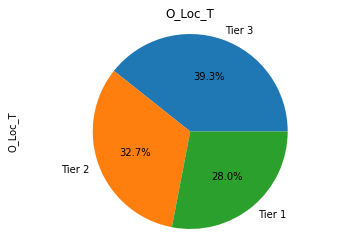

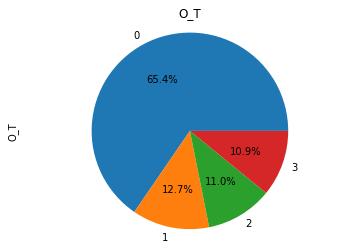

In [ ]:
plot_categorical_columns(df, words)

## Encoding Data (Categorical --> Numerical)

In [ ]:
ohe = pd.get_dummies(df[['I_category' , 'O_Id']])
ohe.head()

,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,I_category_Canned,I_category_Dairy,I_category_Frozen Foods,I_category_Fruits and Vegetables,I_category_Hard Drinks,I_category_Health and Hygiene,I_category_Household,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['I_category' , 'O_Id'], axis = 1)
df = pd.concat([df , ohe], axis = 1)
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,Low Fat,0.016172,225.644532,317.8092,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,Regular,0.019403,82.551132,116.2692,2019,Medium,1,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,Low Fat,0.016885,148.828780,209.6180,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,Regular,0.070607,177.567450,250.0950,2008,Medium,0,Tier 3,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,Low Fat,0.070607,86.521594,121.8614,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

order = ['I_Fat_C' , 'O_Size' , 'O_Loc_T' , 'O_Establ_Y']

for x in order:
  df[x] = le.fit_transform(df[x])


In [ ]:
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,0,0.016172,225.644532,317.8092,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019403,82.551132,116.2692,8,1,1,2,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016885,148.828780,209.6180,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.070607,177.567450,250.0950,3,1,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.070607,86.521594,121.8614,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting Data into _Training_ and _Testing_ Data (LR)

In [ ]:
y = df['I_O_Sales']
x = df.drop(['I_O_Sales' , 'I_MRP_JD'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 42)

## Linear Regression Model (No Normalization) 

In [ ]:
x_b = np.c_[np.ones((x_train.shape[0] , 1)) , x_train]
x_test = np.c_[np.ones((x_test.shape[0] , 1)) , x_test]

a = 0.00001
iter = 1000
m = x_train.shape[0]

beta = np.random.randn(x_train.shape[1]+1)

print(f'initial beta {beta}')
for i in range(iter):
  gd = 2/m * x_b.T.dot(x_b.dot(beta) - y_train)

  beta = beta - (a * gd)

  print(f'beta in iterations {i + 1} is {beta}')

Streaming output truncated to the last 5000 lines.
  1.71853988 -1.15341334 -1.19604625 -1.24992322 -0.70709776  0.55680744
 -1.18748881  2.99610544  0.99974742  1.39617126 -0.07591992  0.9243964 ]
beta in iterations 279 is [-0.3974705  -4.34101583 -0.60648903  2.19609309 12.03561029 -2.76806915
 -1.76009892 -0.49357945  1.45577259  0.19832487  1.13879929  0.7967987
 -0.54080766 -0.94989819  1.60215591  0.79700668 -0.98391955  1.63088034
  0.41124115 -0.71221325  0.53299926 -1.61223821 -2.79482017  0.12600682
  1.71835683 -1.15337128 -1.19854547 -1.24976012 -0.70685961  0.55629571
 -1.189801    2.99921315  1.00002904  1.39606559 -0.07588466  0.92465941]
beta in iterations 280 is [-0.39881007 -4.35751952 -0.60665937  2.19576748 12.03668999 -2.77554393
 -1.7635968  -0.49351781  1.45670684  0.19819398  1.13855924  0.79672629
 -0.54084624 -0.94984342  1.60188677  0.79678856 -0.98391515  1.63088114
  0.41114912 -0.71236306  0.53296773 -1.6123274  -2.79478638  0.1259153
  1.71817379 -1.15332

In [ ]:
y_pred = np.dot(x_test , beta)

In [ ]:
from math import sqrt
from statistics import variance

x1 = (y_test - y_pred)
x2 = x1**2
rss = x2.sum()

xx1 = (y_test - y_test.mean())
xx2 = xx1**2
tss = xx2.sum()

r2 = 1 - (rss / tss)

mse = np.square(np.subtract(y_test , y_pred)).mean()
rsme = sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

## Linear Regression Evaluation Measures

In [ ]:
print('R squared is: ', r2)
print(' Mean Square Error is: ', mse)
print(' Root Mean Square Error is: ', rsme)
print(' Mean Absolute Error is: ', mae)

R squared is:  0.30316973180156304
 Mean Square Error is:  1953024.466133912
 Root Mean Square Error is:  1397.506517385129
 Mean Absolute Error is:  1048.9297128802177


# KNN (No Normalization)


## Reading the CSV File

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.30,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.92,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.50,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.20,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.93,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052


## Preprocessing and cleaning the data

In [ ]:
df.isnull().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [ ]:
df['I_Fat_C'] = df['I_Fat_C'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['I_W'] = df['I_W'].fillna(df['I_W'].mean())

In [ ]:
df['O_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: O_Size, dtype: int64

In [ ]:
df['O_Size'] = df['O_Size'].fillna('Medium')

In [ ]:
df['O_Establ_Y'] = df['O_Establ_Y'].astype('object')

In [ ]:
df['I_Vis'] = df['I_Vis'].replace(0, np.nan)

In [ ]:
df['I_Vis'] = df['I_Vis'].fillna(df['I_Vis'].mean())

In [ ]:
df = df.drop(['I_Id'] , axis = 1)

In [ ]:
df['O_T'] = df['O_T'].map({'Carrefour': 0, 'Family Basket': 1, 'Cozmo' : 2, 'C-Town': 3 })

In [ ]:
df['I_Recalled'] = df['I_Recalled'].replace({'NO': 0 , 'YES': 1})

## Encoding Data (Categorical --> Numerical)

In [ ]:
ohe = pd.get_dummies(df[['I_category' , 'O_Id']])
ohe

,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,I_category_Canned,I_category_Dairy,I_category_Frozen Foods,I_category_Fruits and Vegetables,I_category_Hard Drinks,I_category_Health and Hygiene,I_category_Household,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df.drop(['I_category' , 'O_Id'], axis = 1)
df = pd.concat([df , ohe], axis = 1)
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.300,Low Fat,0.016172,225.644532,317.8092,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,0.019403,82.551132,116.2692,2019,Medium,1,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,0.016885,148.828780,209.6180,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,0.070607,177.567450,250.0950,2008,Medium,0,Tier 3,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Low Fat,0.070607,86.521594,121.8614,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,282.5218,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,Regular,0.047107,125.071470,176.1570,2012,Medium,0,Tier 2,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,Low Fat,0.035311,108.716904,153.1224,2014,Small,0,Tier 2,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,Regular,0.145346,121.504572,171.1332,2019,Medium,0,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

order = ['I_Fat_C' , 'O_Size' , 'O_Loc_T' , 'O_Establ_Y']

for x in order:
  df[x] = le.fit_transform(df[x])


In [ ]:
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,0,0.016172,225.644532,317.8092,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019403,82.551132,116.2692,8,1,1,2,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016885,148.828780,209.6180,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.070607,177.567450,250.0950,3,1,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.070607,86.521594,121.8614,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting Data Into _Training_ and _Testing_ Data (KNN)

In [ ]:
y = df['O_T']
x = df.drop(['O_T'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

## KNN Model (No Normalization)

In [ ]:
from scipy.stats import mode

def euc(p1 , p2):
  distance = np.sqrt(np.sum((p1 - p2) ** 2))
  return distance

def prediction(x_train , y , x_input, k ):
  op_labels = []

  for item in x_input:

    point_distance = []

    for j in range(len(x_train)):
      dist = euc(np.array(x_train[j,:]) , item)

      point_distance.append(dist)
    point_distance = np.array(point_distance)

    distance = np.argsort(point_distance)[:k]

    labels = y[distance]

    lab = mode(labels)
    lab = lab.mode[0]
    op_labels.append(lab)
  return op_labels

In [ ]:
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

y_pred = prediction(x_train , y_train , x_test , 11)

## KNN Evaluation Measures

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

print('accuracy is: ', accuracy_score(y_test , y_pred))
print('precision is: ' , precision_score(y_test , y_pred , average = 'macro'))
print('recall is: ', recall_score(y_test , y_pred , average = 'macro'))
print('f1 score is: ' , f1_score(y_test , y_pred , average = 'macro'))

accuracy is:  0.7593316743690011
precision is:  0.5520521902665316
recall is:  0.5001462665791995
f1 score is:  0.4910829283288321


# Linear Regression (Min-max Normalization)

## Reading the CSV File.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.30,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.92,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.50,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.20,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.93,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052


## Preprocessing and cleaning the data

In [4]:
df.isnull().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [5]:
df['I_Fat_C'] = df['I_Fat_C'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [6]:
df['I_W'] = df['I_W'].fillna(df['I_W'].mean())

In [7]:
df['O_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: O_Size, dtype: int64

In [8]:
df['O_Size'] = df['O_Size'].fillna('Medium')

In [9]:
df['O_Establ_Y'] = df['O_Establ_Y'].astype('object')

In [10]:
df['I_Vis'] = df['I_Vis'].replace(0, np.nan)

In [11]:
df['I_Vis'] = df['I_Vis'].fillna(df['I_Vis'].mean())

In [12]:
df = df.drop(['I_Id'] , axis = 1)

In [13]:
df['O_T'] = df['O_T'].map({'Carrefour': 0, 'Family Basket': 1, 'Cozmo' : 2, 'C-Town': 3 })

In [14]:
df['I_Recalled'] = df['I_Recalled'].replace({'NO': 0 , 'YES': 1})

In [15]:
df.isnull().sum()

I_W           0
I_Fat_C       0
I_Vis         0
I_MRP_JD      0
I_category    0
I_MRP_US      0
O_Id          0
O_Establ_Y    0
O_Size        0
I_Recalled    0
O_Loc_T       0
O_T           0
I_O_Sales     0
dtype: int64

In [16]:
df.describe()

,I_W,I_Vis,I_MRP_JD,I_MRP_US,I_Recalled,O_T,I_O_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070607,148.384875,208.992782,0.008800,0.673120,2361.288914
std,4.226124,0.048730,44.215297,62.275067,0.093399,1.045397,1706.499616
min,4.555000,0.003700,70.495900,99.290000,0.000000,0.000000,213.290000
25%,9.310000,0.033210,114.896815,161.826500,0.000000,0.000000,1014.247400
50%,12.857645,0.062642,149.819088,211.012800,0.000000,0.000000,1974.331000
75%,16.000000,0.094710,180.087027,253.643700,0.000000,1.000000,3281.296400
max,21.350000,0.328516,237.770764,334.888400,1.000000,3.000000,13266.964800


## Encoding Data (Categorical --> Numerical)

In [17]:
ohe = pd.get_dummies(df[['I_category' , 'O_Id']])
ohe

,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,I_category_Canned,I_category_Dairy,I_category_Frozen Foods,I_category_Fruits and Vegetables,I_category_Hard Drinks,I_category_Health and Hygiene,I_category_Household,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
df = df.drop(['I_category' , 'O_Id'], axis = 1)
df = pd.concat([df , ohe], axis = 1)
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.300,Low Fat,0.016172,225.644532,317.8092,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,0.019403,82.551132,116.2692,2019,Medium,1,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,0.016885,148.828780,209.6180,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,0.070607,177.567450,250.0950,2008,Medium,0,Tier 3,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Low Fat,0.070607,86.521594,121.8614,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,282.5218,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,Regular,0.047107,125.071470,176.1570,2012,Medium,0,Tier 2,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,Low Fat,0.035311,108.716904,153.1224,2014,Small,0,Tier 2,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,Regular,0.145346,121.504572,171.1332,2019,Medium,0,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

order = ['I_Fat_C' , 'O_Size' , 'O_Loc_T' , 'O_Establ_Y']

for x in order:
  df[x] = le.fit_transform(df[x])


In [20]:
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,0,0.016172,225.644532,317.8092,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019403,82.551132,116.2692,8,1,1,2,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016885,148.828780,209.6180,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.070607,177.567450,250.0950,3,1,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.070607,86.521594,121.8614,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting Data into _Training_ and _Testing_ Data (LR)

In [21]:
df=(df-df.min())/(df.max()-df.min())
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0.282525,0.0,0.038399,0.927507,0.927507,0.500,0.5,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,1.0,0.048346,0.072068,0.072068,1.000,0.5,1.0,1.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.468288,0.500,0.5,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,1.0,0.205985,0.640093,0.640093,0.375,0.5,0.0,1.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.0,0.205985,0.095805,0.095805,0.125,0.0,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y = df['I_O_Sales']
x = df.drop(['I_O_Sales' , 'I_MRP_JD'],axis = 1)

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 42)

## Linear Regression Model (Min-max Normalization) 

In [24]:
x_b = np.c_[np.ones((x_train.shape[0] , 1)) , x_train]
x_test = np.c_[np.ones((x_test.shape[0] , 1)) , x_test]

a = 0.2
iter = 10000
m = x_train.shape[0]

beta = np.random.randn(x_train.shape[1]+1)

print(f'initial beta {beta}')
for i in range(iter):
  gd = 2/m * x_b.T.dot(x_b.dot(beta) - y_train)

  beta = beta - (a * gd)

  print(f'beta in iterations {i + 1} is {beta}')

Streaming output truncated to the last 5000 lines.
  0.22765097  0.23233774 -0.25581169 -0.90369969  0.08266853  0.14873952
  1.09988653  0.15482782  0.74593089  0.07666479  1.09403438  0.4366924 ]
beta in iterations 9168 is [ 0.02732777 -0.00301224  0.00581832 -0.01173496  0.28646819  0.02513626
 -1.31980414  0.02848502  0.68723924 -0.44011622  0.23074147  0.229163
  0.23212585  0.2349811   0.22372997  0.22954925  0.23386134  0.2353707
  0.23450454  0.23223621  0.22980538  0.23142214  0.26195269  0.23153152
  0.22765097  0.23233774 -0.25581169 -0.90369969  0.08266853  0.14873952
  1.09988653  0.15482782  0.74593089  0.07666479  1.09403438  0.4366924 ]
beta in iterations 9169 is [ 0.02732777 -0.00301224  0.00581832 -0.01173496  0.28646819  0.02513626
 -1.31980414  0.02848502  0.68723924 -0.44011622  0.23074147  0.229163
  0.23212585  0.2349811   0.22372997  0.22954925  0.23386134  0.2353707
  0.23450454  0.23223621  0.22980538  0.23142214  0.26195269  0.23153152
  0.22765097  0.2323377

In [25]:
y_pred = np.dot(x_test , beta)

In [26]:
from math import sqrt
from statistics import variance

x1 = (y_test - y_pred)
x2 = x1**2
rss = x2.sum()

xx1 = (y_test - y_test.mean())
xx2 = xx1**2
tss = xx2.sum()

r2 = 1 - (rss / tss)

mse = np.square(np.subtract(y_test , y_pred)).mean()
rsme = sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

## Linear Regression Evaluation Measures

In [27]:
print('R squared is: ', r2)
print(' Mean Square Error is: ', mse)
print(' Root Mean Square Error is: ', rsme)
print(' Mean Absolute Error is: ', mae)

R squared is:  0.5668770988132885
 Mean Square Error is:  0.00712403830989707
 Root Mean Square Error is:  0.0844040183279035
 Mean Absolute Error is:  0.062278074210773825


# KNN (Min-max Normalization)

## Reading the CSV File

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.30,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.92,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.50,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.20,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.93,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052


## Preprocessing and cleaning the data

In [ ]:
df.isnull().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [ ]:
df['I_Fat_C'] = df['I_Fat_C'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['I_W'] = df['I_W'].fillna(df['I_W'].mean())

In [ ]:
df['O_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: O_Size, dtype: int64

In [ ]:
df['O_Size'] = df['O_Size'].fillna('Medium')

In [ ]:
df['O_Establ_Y'] = df['O_Establ_Y'].astype('object')

In [ ]:
df['I_Vis'] = df['I_Vis'].replace(0, np.nan)

In [ ]:
df['I_Vis'] = df['I_Vis'].fillna(df['I_Vis'].mean())

In [ ]:
df = df.drop(['I_Id'] , axis = 1)

In [ ]:
df['O_T'] = df['O_T'].map({'Carrefour': 0, 'Family Basket': 1, 'Cozmo' : 2, 'C-Town': 3 })

In [ ]:
df['I_Recalled'] = df['I_Recalled'].replace({'NO': 0 , 'YES': 1})

## Encoding Data (Categorical --> Numerical)

In [ ]:
ohe = pd.get_dummies(df[['I_category' , 'O_Id']])
ohe

,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,I_category_Canned,I_category_Dairy,I_category_Frozen Foods,I_category_Fruits and Vegetables,I_category_Hard Drinks,I_category_Health and Hygiene,I_category_Household,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df.drop(['I_category' , 'O_Id'], axis = 1)
df = pd.concat([df , ohe], axis = 1)
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.300,Low Fat,0.016172,225.644532,317.8092,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,0.019403,82.551132,116.2692,2019,Medium,1,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,0.016885,148.828780,209.6180,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,0.070607,177.567450,250.0950,2008,Medium,0,Tier 3,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Low Fat,0.070607,86.521594,121.8614,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,282.5218,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,Regular,0.047107,125.071470,176.1570,2012,Medium,0,Tier 2,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,Low Fat,0.035311,108.716904,153.1224,2014,Small,0,Tier 2,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,Regular,0.145346,121.504572,171.1332,2019,Medium,0,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

order = ['I_Fat_C' , 'O_Size' , 'O_Loc_T' , 'O_Establ_Y']

for x in order:
  df[x] = le.fit_transform(df[x])


In [ ]:
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,0,0.016172,225.644532,317.8092,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019403,82.551132,116.2692,8,1,1,2,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016885,148.828780,209.6180,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.070607,177.567450,250.0950,3,1,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.070607,86.521594,121.8614,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting Data Into _Training_ and _Testing_ Data (KNN)

In [ ]:
y = df['O_T']
x = df.drop(['O_T'],axis = 1)

In [ ]:
df=(df-df.min())/(df.max()-df.min())
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0.282525,0.0,0.038399,0.927507,0.927507,0.500,0.5,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,1.0,0.048346,0.072068,0.072068,1.000,0.5,1.0,1.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.468288,0.500,0.5,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,1.0,0.205985,0.640093,0.640093,0.375,0.5,0.0,1.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.0,0.205985,0.095805,0.095805,0.125,0.0,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

## KNN Model (Min-max Normalization) 

In [ ]:
from scipy.stats import mode

def euc(p1 , p2):
  distance = np.sqrt(np.sum((p1 - p2) ** 2))
  return distance

def prediction(x_train , y , x_input , k):
  op_labels = []

  for item in x_input:

    point_distance = []

    for j in range(len(x_train)):
      dist = euc(np.array(x_train[j,:]) , item)

      point_distance.append(dist)
    point_distance = np.array(point_distance)

    distance = np.argsort(point_distance)[:k]

    labels = y[distance]

    lab = mode(labels)
    lab = lab.mode[0]
    op_labels.append(lab)
  return op_labels

In [ ]:
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

y_pred = prediction(x_train , y_train , x_test , 11)

## KNN Evaluation Measures

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

print('accuracy is: ', accuracy_score(y_test , y_pred))
print('precision is: ' , precision_score(y_test , y_pred , average = 'macro'))
print('recall is: ', recall_score(y_test , y_pred , average = 'macro'))
print('f1 score is: ' , f1_score(y_test , y_pred , average = 'macro'))

accuracy is:  0.7593316743690011
precision is:  0.5520521902665316
recall is:  0.5001462665791995
f1 score is:  0.4910829283288321


# Linear Regression (Z-Score Normalization)

## Reading the CSV File.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.30,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.92,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.50,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.20,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.93,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052


## Preprocessing and cleaning the data

In [ ]:
df.isnull().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [ ]:
df['I_Fat_C'] = df['I_Fat_C'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['I_W'] = df['I_W'].fillna(df['I_W'].mean())

In [ ]:
df['O_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: O_Size, dtype: int64

In [ ]:
df['O_Size'] = df['O_Size'].fillna('Medium')

In [ ]:
df['O_Establ_Y'] = df['O_Establ_Y'].astype('object')

In [ ]:
df['I_Vis'] = df['I_Vis'].replace(0, np.nan)

In [ ]:
df['I_Vis'] = df['I_Vis'].fillna(df['I_Vis'].mean())

In [ ]:
df = df.drop(['I_Id'] , axis = 1)

In [ ]:
df['O_T'] = df['O_T'].map({'Carrefour': 0, 'Family Basket': 1, 'Cozmo' : 2, 'C-Town': 3 })

In [ ]:
df['I_Recalled'] = df['I_Recalled'].replace({'NO': 0 , 'YES': 1})

## Encoding Data (Categorical --> Numerical)

In [ ]:
ohe = pd.get_dummies(df[['I_category' , 'O_Id']])
ohe

,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,I_category_Canned,I_category_Dairy,I_category_Frozen Foods,I_category_Fruits and Vegetables,I_category_Hard Drinks,I_category_Health and Hygiene,I_category_Household,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df.drop(['I_category' , 'O_Id'], axis = 1)
df = pd.concat([df , ohe], axis = 1)
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.300,Low Fat,0.016172,225.644532,317.8092,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,0.019403,82.551132,116.2692,2019,Medium,1,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,0.016885,148.828780,209.6180,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,0.070607,177.567450,250.0950,2008,Medium,0,Tier 3,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Low Fat,0.070607,86.521594,121.8614,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,282.5218,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,Regular,0.047107,125.071470,176.1570,2012,Medium,0,Tier 2,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,Low Fat,0.035311,108.716904,153.1224,2014,Small,0,Tier 2,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,Regular,0.145346,121.504572,171.1332,2019,Medium,0,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

order = ['I_Fat_C' , 'O_Size' , 'O_Loc_T' , 'O_Establ_Y']

for x in order:
  df[x] = le.fit_transform(df[x])


In [ ]:
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,0,0.016172,225.644532,317.8092,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019403,82.551132,116.2692,8,1,1,2,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016885,148.828780,209.6180,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.070607,177.567450,250.0950,3,1,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.070607,86.521594,121.8614,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting Data into _Training_ and _Testing_ Data (LR)

In [ ]:
df = (df - df.mean()) / df.std()

In [ ]:
y = df['I_O_Sales']
x = df.drop(['I_O_Sales' ,  'I_MRP_JD'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 42)

## Linear Regression Model (Z-score Normalization) 

In [ ]:
x_b = np.c_[np.ones((x_train.shape[0] , 1)) , x_train]
x_test = np.c_[np.ones((x_test.shape[0] , 1)) , x_test]

a = 0.001
iter = 10000
m = x_train.shape[0]

beta = np.random.randn(x_train.shape[1]+1)

print(f'initial beta {beta}')
for i in range(iter):
  gd = 2/m * x_b.T.dot(x_b.dot(beta) - y_train)

  beta = beta - (a * gd)

  print(f'beta in iterations {i + 1} is {beta}')

Streaming output truncated to the last 5000 lines.
 -0.02078976 -0.00752791 -1.01287517 -1.77841176 -0.2041055  -0.33818167
  0.08475363 -0.78245742  0.29815438 -0.38894676  0.49061679  0.08725227]
beta in iterations 9168 is [ 0.0044453  -0.00579746  0.02128624 -0.01346734  0.57922231 -0.68008336
 -1.1162933   0.02035051  1.36172578 -0.41999413 -0.01851247 -0.01384929
 -0.00669036 -0.00992298 -0.03350223 -0.02373547 -0.01616872 -0.00538057
 -0.00981741 -0.01802632 -0.01676519 -0.00900537  0.01458239 -0.0221898
 -0.02078977 -0.00752791 -1.01287517 -1.77841176 -0.2041055  -0.33818167
  0.08475363 -0.78245742  0.29815438 -0.38894676  0.49061679  0.08725227]
beta in iterations 9169 is [ 0.0044453  -0.00579746  0.02128622 -0.01346734  0.57922231 -0.68008336
 -1.1162933   0.02035051  1.36172578 -0.41999413 -0.01851247 -0.01384929
 -0.00669035 -0.00992298 -0.03350223 -0.02373547 -0.01616872 -0.00538058
 -0.00981742 -0.01802633 -0.01676518 -0.00900537  0.01458239 -0.0221898
 -0.02078978 -0.007

In [ ]:
y_pred = np.dot(x_test , beta)

In [ ]:
from math import sqrt
from statistics import variance

x1 = (y_test - y_pred)
x2 = x1**2
rss = x2.sum()

xx1 = (y_test - y_test.mean())
xx2 = xx1**2
tss = xx2.sum()

r2 = 1 - (rss / tss)

mse = np.square(np.subtract(y_test , y_pred)).mean()
rsme = sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

## Linear Regression Evaluation Measures

In [ ]:
print('R squared is: ', r2)
print(' Mean Square Error is: ', mse)
print(' Root Mean Square Error is: ', rsme)
print(' Mean Absolute Error is: ', mae)

R squared is:  0.5668765869425876
 Mean Square Error is:  0.4168501365498132
 Root Mean Square Error is:  0.6456393238874265
 Mean Absolute Error is:  0.47638923644205117


# KNN (Z-Score Normalization)

## Reading the CSV File

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.30,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.92,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.50,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.20,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.93,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052


## Preprocessing and cleaning the data

In [ ]:
df.isnull().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [ ]:
df['I_Fat_C'] = df['I_Fat_C'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['I_W'] = df['I_W'].fillna(df['I_W'].mean())

In [ ]:
df['O_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: O_Size, dtype: int64

In [ ]:
df['O_Size'] = df['O_Size'].fillna('Medium')

In [ ]:
df['O_Establ_Y'] = df['O_Establ_Y'].astype('object')

In [ ]:
df['I_Vis'] = df['I_Vis'].replace(0, np.nan)

In [ ]:
df['I_Vis'] = df['I_Vis'].fillna(df['I_Vis'].mean())

In [ ]:
df = df.drop(['I_Id'] , axis = 1)

In [ ]:
df['O_T'] = df['O_T'].map({'Carrefour': 0, 'Family Basket': 1, 'Cozmo' : 2, 'C-Town': 3 })

In [ ]:
df['I_Recalled'] = df['I_Recalled'].replace({'NO': 0 , 'YES': 1})

## Encoding Data (Categorical --> Numerical)

In [ ]:
ohe = pd.get_dummies(df[['I_category' , 'O_Id']])
ohe

,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,I_category_Canned,I_category_Dairy,I_category_Frozen Foods,I_category_Fruits and Vegetables,I_category_Hard Drinks,I_category_Health and Hygiene,I_category_Household,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df.drop(['I_category' , 'O_Id'], axis = 1)
df = pd.concat([df , ohe], axis = 1)
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.300,Low Fat,0.016172,225.644532,317.8092,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,0.019403,82.551132,116.2692,2019,Medium,1,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,0.016885,148.828780,209.6180,2009,Medium,0,Tier 1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,0.070607,177.567450,250.0950,2008,Medium,0,Tier 3,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Low Fat,0.070607,86.521594,121.8614,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,282.5218,1997,High,0,Tier 3,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,Regular,0.047107,125.071470,176.1570,2012,Medium,0,Tier 2,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,Low Fat,0.035311,108.716904,153.1224,2014,Small,0,Tier 2,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,Regular,0.145346,121.504572,171.1332,2019,Medium,0,Tier 3,3,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

order = ['I_Fat_C' , 'O_Size' , 'O_Loc_T' , 'O_Establ_Y']

for x in order:
  df[x] = le.fit_transform(df[x])


In [ ]:
df.head()

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_MRP_US,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,...,O_Id_OUT010,O_Id_OUT013,O_Id_OUT017,O_Id_OUT018,O_Id_OUT019,O_Id_OUT027,O_Id_OUT035,O_Id_OUT045,O_Id_OUT046,O_Id_OUT049
0,9.30,0,0.016172,225.644532,317.8092,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019403,82.551132,116.2692,8,1,1,2,3,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016885,148.828780,209.6180,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.070607,177.567450,250.0950,3,1,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.070607,86.521594,121.8614,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting Data Into _Training_ and _Testing_ Data (KNN)

In [ ]:
y = df['O_T']
x = df.drop(['I_O_Sales' , 'I_W' , 'I_Fat_C' , 'I_Vis' , 'O_T'],axis = 1)

In [ ]:
df = (df - df.mean()) / df.std()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

## KNN Model (Z-score Normalization) 

In [ ]:
from scipy.stats import mode

def euc(p1 , p2):
  distance = np.sqrt(np.sum((p1 - p2) ** 2))
  return distance

def prediction(x_train , y , x_input , k):
  op_labels = []

  for item in x_input:

    point_distance = []

    for j in range(len(x_train)):
      dist = euc(np.array(x_train[j,:]) , item)

      point_distance.append(dist)
    point_distance = np.array(point_distance)

    distance = np.argsort(point_distance)[:k]

    labels = y[distance]

    lab = mode(labels)
    lab = lab.mode[0]
    op_labels.append(lab)
  return op_labels

In [ ]:
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

y_pred = prediction(x_train , y_train , x_test , 11)

## KNN Evaluation Measures

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

print('accuracy is: ', accuracy_score(y_test , y_pred))
print('precision is: ' , precision_score(y_test , y_pred , average = 'macro'))
print('recall is: ', recall_score(y_test , y_pred , average = 'macro'))
print('f1 score is: ' , f1_score(y_test , y_pred , average = 'macro'))

accuracy is:  0.9665689149560117
precision is:  0.9759735880462233
recall is:  0.9409912106571588
f1 score is:  0.956739138594668
